# Tugas 1: Pemrograman perbaikan citra dalam domain spasial
- Point Processing
- Histogram Equalization
- Contrast Limited Adaptive Histogram Equalization (CLAHE)

### Import Library

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import shutil
from skimage import exposure

### Create Directory

In [2]:
directories = ["Original", "Output"]

for directory in directories:
    os.makedirs(directory, exist_ok=True)

# Subdir
subdirectories = ["Grayed", "Point Processing", "Histogram Equalization", "CLAHE"]
for subdirectory in subdirectories:
    output_directory = os.path.join("Output", subdirectory)
    os.makedirs(output_directory, exist_ok=True)

print("Directory Created")

Directory Created


### Import Picture

### Local
Run this if you are on local

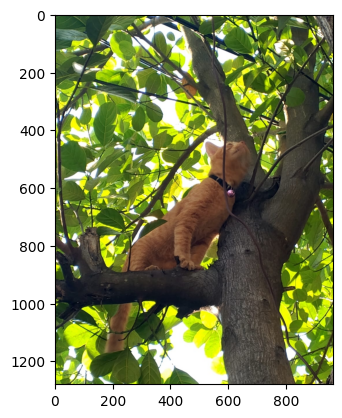

In [3]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Import Image
def import_image():
    Tk().withdraw()
    img_path = askopenfilename(title="Select an image", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    
    if img_path:
        shutil.copy(img_path, 'Original')
        # print(f"Image saved to {img_path}")
        return img_path
    else:
        print("No image selected.")
        return None
    
# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        # plt.axis('off')
        plt.show()
    else:
        print("No image to display.")
    
image_path = import_image()
display_image(image_path)

### Google Colab
Run this if you are on google colab

In [ ]:
from google.colab import files

# Import Image
def import_image_colab():
    uploaded = files.upload()
    
    if uploaded:
        img_path = list(uploaded.keys())[0]
        
        if not os.path.exists('Original'):
            os.makedirs('Original')
        shutil.move(img_path, os.path.join('Original', img_path))
        
        return os.path.join('Original', img_path)
    else:
        print("No image uploaded.")
        return None

# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        # plt.axis('off')
        plt.show()
    else:
        print("No image to display.")

image_path = import_image_colab()
display_image(image_path)

### Turn The Image Into Gray Scale

Grayscale image saved to: Output/Grayed\mycat_grayed.jpg


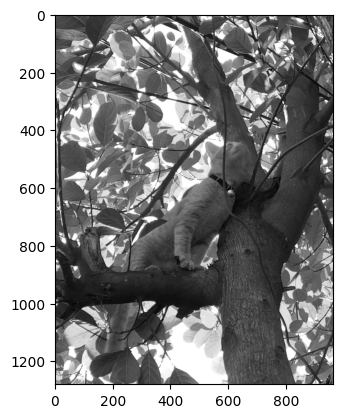

In [4]:
# Gray Scaling
def convert_to_grayscale(image_path):
    img = Image.open(image_path).convert("L")
    return img

def save_grayscale_image(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    gray_img = convert_to_grayscale(image_path)
    
    new_filename = f"{name}_grayed{ext}"
    new_path = os.path.join("Output/Grayed", new_filename)
    
    gray_img.save(new_path)
    print(f"Grayscale image saved to: {new_path}")

save_grayscale_image(image_path)

# Display
def display_grayscale_image(image_path):
    img = Image.open(image_path)
    
    plt.imshow(img, cmap="gray")
    # plt.axis('off')
    plt.show()

display_grayscale_image(os.path.join("Output/Grayed", f"{os.path.splitext(os.path.basename(image_path))[0]}_grayed{os.path.splitext(image_path)[1]}"))


## Point Processing

### Choose Image

In [7]:
selected_filename = "mycat_grayed.jpg"  # Ganti Bebas

### Calculation & Display The Result

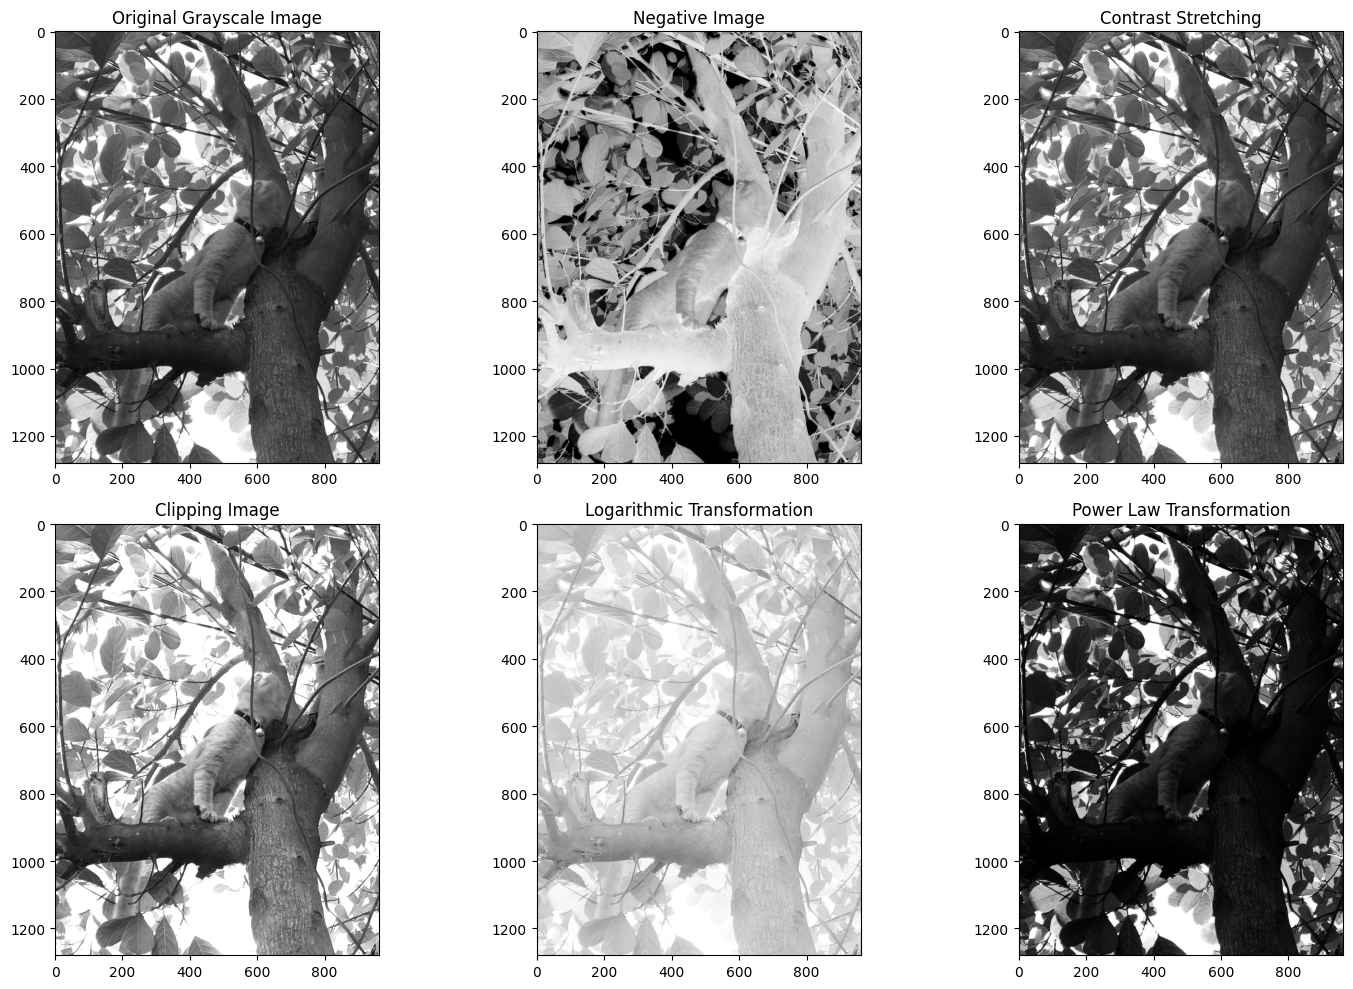

In [8]:
# Get Image
def get_image(filename):
    grayed_image_path = os.path.join("Output", "Grayed", filename)
    return grayed_image_path

def save_image(image, filename):
    output_directory = os.path.join("Output", "Point Processing")
    image.save(os.path.join(output_directory, filename))

# Display grayscale
def display_grayscale_image(image_path):
    img = Image.open(image_path)
    
    plt.imshow(img, cmap="gray")
    # plt.axis('off')
    plt.show()

# Negative Image
def negative_image(image_path):
    img = Image.open(image_path)
    img_array = np.array(img) # Image to Array
    
    negative_img_array = 255 - img_array  # negative = 255 - pixel_value
    
    negative_img = Image.fromarray(negative_img_array) # Back to Image from array
    return negative_img

# Contrast Stretching
def contrast_stretching(image_path):
    img = Image.open(image_path)
    img_array = np.array(img).astype('float') # Image to Array

    min_val = np.min(img_array)
    max_val = np.max(img_array)

    # Contrast stretching formula: (pixel - min) * (255 / (max - min))
    stretched_img_array = (img_array - min_val) * (255 / (max_val - min_val))
    stretched_img_array = np.clip(stretched_img_array, 0, 255)

    # Back to Image from array
    stretched_img = Image.fromarray(stretched_img_array.astype('uint8'))
    return stretched_img

# Clipping
def clipping_image(image_path, clip_value=150):
    img = Image.open(image_path)
    img_array = np.array(img)  # Image to Array

    # Clipping: Cuts pixel values ​​that are greater than clip_value
    clipped_img_array = np.clip(img_array, 0, clip_value)
    clipped_img_array = (clipped_img_array / clip_value) * 255

    # Back to Image from array
    clipped_img = Image.fromarray(clipped_img_array.astype('uint8'))
    return clipped_img

# Log Transformation
def log_transformation(image_path, c=1):
    img = Image.open(image_path)
    img_array = np.array(img).astype('float') # Image to Array

    # Log transformation formula: c * log(1 + pixel_value)
    log_img_array = c * np.log1p(img_array)
    log_img_array = (log_img_array / np.max(log_img_array)) * 255

    # Back to Image from array
    log_img = Image.fromarray(log_img_array.astype('uint8'))
    return log_img

# Power Law
def power_law_transformation(image_path, gamma=1.0, c=1):
    img = Image.open(image_path)
    img_array = np.array(img).astype('float') # Image to Array

    # Power law transformation formula: c * pixel_value ^ gamma
    power_img_array = c * np.power(img_array, gamma)
    power_img_array = (power_img_array / np.max(power_img_array)) * 255

    # Back to Image from array
    power_img = Image.fromarray(power_img_array.astype('uint8'))
    return power_img

# Display Image
def display_processed_images_from_grayed(filename):
    grayed_image_path = get_image(filename)
    file_basename, file_extension = os.path.splitext(filename)
    
    # SubPlt
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # grayscale
    original_img = Image.open(grayed_image_path)
    axes[0].imshow(original_img, cmap="gray")
    axes[0].set_title("Original Grayscale Image")
    # axes[0].axis('off')
    
    # negative
    negative_img = negative_image(grayed_image_path)
    axes[1].imshow(negative_img, cmap="gray")
    axes[1].set_title("Negative Image")
    # axes[1].axis('off')
    save_image(negative_img, f"{file_basename}_Negative{file_extension}")

    # contrast stretching
    contrast_img = contrast_stretching(grayed_image_path)
    axes[2].imshow(contrast_img, cmap="gray")
    axes[2].set_title("Contrast Stretching")
    # axes[2].axis('off')
    save_image(contrast_img, f"{file_basename}_Contrast{file_extension}")

    # clipping
    clipped_img = clipping_image(grayed_image_path, clip_value=150)
    axes[3].imshow(clipped_img, cmap="gray")
    axes[3].set_title("Clipping Image")
    # axes[3].axis('off')
    save_image(clipped_img, f"{file_basename}_Clipping{file_extension}")

    # log transformation
    log_img = log_transformation(grayed_image_path, c=1)
    axes[4].imshow(log_img, cmap="gray")
    axes[4].set_title("Logarithmic Transformation")
    # axes[4].axis('off')
    save_image(log_img, f"{file_basename}_Logarithmic{file_extension}")

    # power law transformation
    power_img = power_law_transformation(grayed_image_path, gamma=2.0, c=1)
    axes[5].imshow(power_img, cmap="gray")
    axes[5].set_title("Power Law Transformation")
    # axes[5].axis('off')
    save_image(power_img, f"{file_basename}_PowerLaw{file_extension}")

    plt.tight_layout()
    plt.show()

display_processed_images_from_grayed(selected_filename)

## Histogram Equalization

### Choose Image

In [9]:
selected_filename = "mycat_grayed.jpg"  # Ganti Bebas

### Calculation & Display The Result

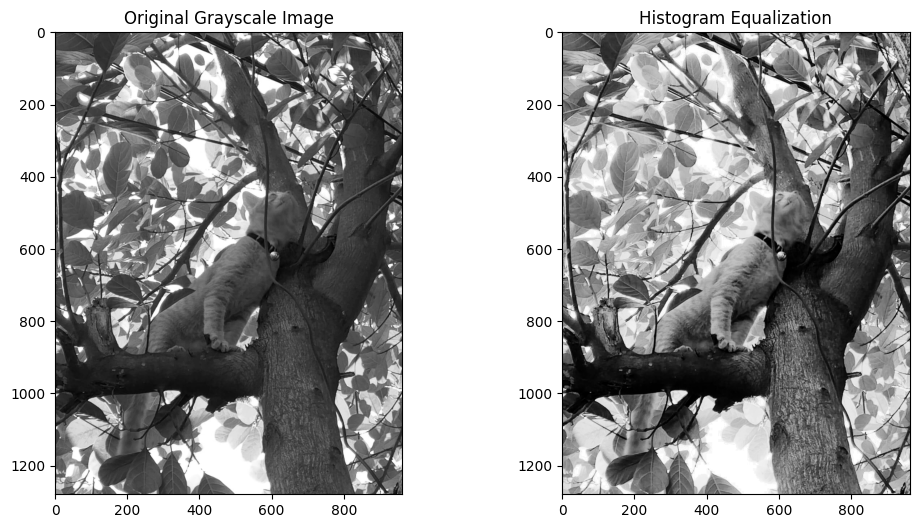

In [10]:
# Get Image
def get_image(filename):
    grayed_image_path = os.path.join("Output", "Grayed", filename)
    return grayed_image_path

def save_image(image, filename):
    output_directory = os.path.join("Output", "Histogram Equalization")
    image.save(os.path.join(output_directory, filename))

# Histogram Equalization
def histogram_equalization(image_path):
    img = Image.open(image_path)
    img_array = np.array(img) # Image to Array

    # calculation using skimage
    img_equalized_array = exposure.equalize_hist(img_array) * 255
    img_equalized_array = np.clip(img_equalized_array, 0, 255).astype('uint8')

    # Back to Image from array
    img_equalized = Image.fromarray(img_equalized_array)
    return img_equalized

# Display Image
def display_and_save_histogram_equalization(filename):
    grayed_image_path = get_image(filename)
    file_basename, file_extension = os.path.splitext(filename)
    
    original_img = Image.open(grayed_image_path)
    equalized_img = histogram_equalization(grayed_image_path)
    
    # subplt
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # grayscale
    axes[0].imshow(original_img, cmap="gray")
    axes[0].set_title("Original Grayscale Image")
    # axes[0].axis('off')
    
    # histogram equalization
    axes[1].imshow(equalized_img, cmap="gray")
    axes[1].set_title("Histogram Equalization")
    # axes[1].axis('off')

    plt.show()

    save_image(equalized_img, f"{file_basename}_HistogramEqualization{file_extension}")

display_and_save_histogram_equalization(selected_filename)

## Contrast Limited Adaptive Histogram Equalization (CLAHE)

### Choose Image

In [11]:
selected_filename = "mycat_grayed.jpg"  # Ganti Bebas

### Calculation & Display The Result

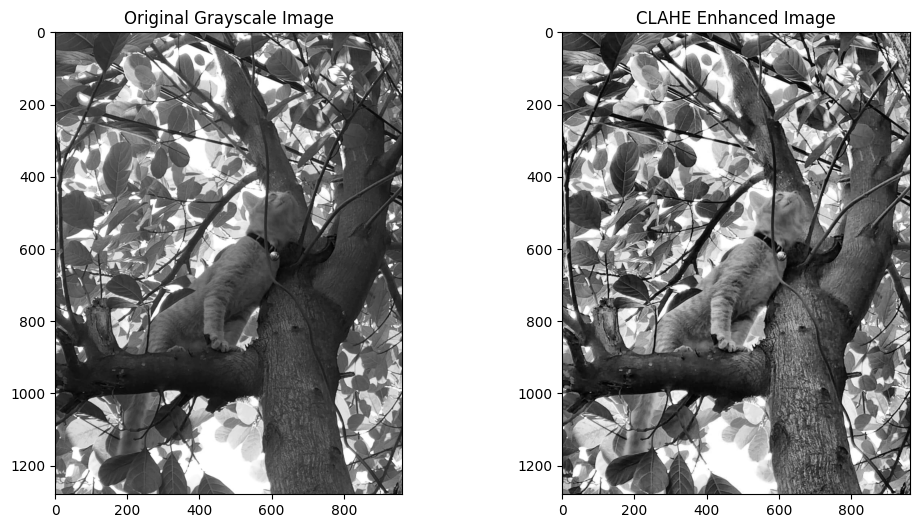

In [12]:
# Get Image
def get_image(filename):
    grayed_image_path = os.path.join("Output", "Grayed", filename)
    return grayed_image_path

def save_image(image, filename):
    output_directory = os.path.join("Output", "CLAHE")
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    image.save(os.path.join(output_directory, filename))

# CLAHE Enhancement
def clahe_enhancement(image_path):
    # OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Make the CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # CLAHE Implementation
    clahe_img = clahe.apply(img)
    
    # Back to Image from array
    clahe_img_pil = Image.fromarray(clahe_img)
    return clahe_img_pil

# Display Image
def display_and_save_clahe_enhancement(filename):
    grayed_image_path = get_image(filename)
    file_basename, file_extension = os.path.splitext(filename)
    
    original_img = Image.open(grayed_image_path)
    clahe_img = clahe_enhancement(grayed_image_path)
    
    # subplt
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # grayscale
    axes[0].imshow(original_img, cmap="gray")
    axes[0].set_title("Original Grayscale Image")
    # axes[0].axis('off')
    
    # CLAHE enhancement
    axes[1].imshow(clahe_img, cmap="gray")
    axes[1].set_title("CLAHE Enhanced Image")
    # axes[1].axis('off')

    plt.show()

    save_image(clahe_img, f"{file_basename}_CLAHE{file_extension}")

display_and_save_clahe_enhancement(selected_filename)
